In [6]:
# PyTorch框架
import torch
# torchvision：计算机视觉工具包
import torchvision
import torchvision.transforms as transforms

# 数据预处理
# torchvision加载数据集的输出是范围[0,1]的PILImage图像，我们需将它们转换为归一化范围[-1,1]的张量
transform = transforms.Compose(
    [# 随机旋转图片
     # transforms.RandomHorizontalFlip(),
     # ToTensor()能够把灰度范围从0-255变换到0-1之间，将shape为(H, W, C)的PIL.Image或者numpy.array数据类型转为shape为(C, H, W)的torch.FloatTensor类型
     # 例如：test_data_x = test_data.data.type(torch.FloatTensor)/255.0 
     # 尺寸为Channel*Height*Width，数值归一化范围缩小为[0.0, 1.0]（归一化方法：直接除以255即可）
     transforms.ToTensor(),
     # Normalize()数据标准化处理（均值为0，方差为1）：对数据按通道进行标准化，即减去均值，再除以标准差
     # 使用公式"(x-mean)/std"，将0-1变换到(-1,1)
     # CIFAR10数据值都是彩色RGB图，所以图像的通道数有3个，因此均值和标准差各有3个
     # Normalize的两个参数是两个不变的list，即是tuple
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 训练集(50000张图片)
# CIFAR10数据集的下载：下载位置当前目录的data文件下
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# 实际过程需要分批次（batch）训练，打乱训练集，每一批随机拿出50张图片进行训练
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50,
                                          shuffle=True, num_workers=0)

# 测试集(10000张图片)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)

# batch_size=10000：一次性全部拿出来，来计算测试集的准确率
testloader = torch.utils.data.DataLoader(testset, batch_size=10000,
                                         shuffle=False, num_workers=0)

# 将testloader转换成可迭代的迭代器，它的next方法获取测试集单个batch中的所有样本图像和标签，用于accuracy计算
test_data_iter = iter(testloader)
test_image,test_label = next(test_data_iter)

# 标签
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 可视化部分训练图像
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # 反标准化
    npimg = img.numpy()     # 将图片转化为原来的numpy格式
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 转换成原始shape格式
    plt.show()
    

Files already downloaded and verified


In [7]:
classes

['plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

dog   plane horse dog   deer  dog   car   plane car   ship  frog  cat   deer  plane bird  cat   frog  frog  ship  dog   deer  horse frog  ship  car   plane horse deer  truck horse cat   cat   deer  frog  plane plane horse dog   truck horse dog   plane horse car   plane truck deer  car   plane cat  


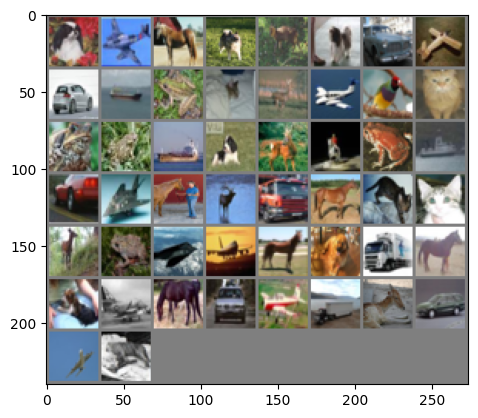

In [8]:
# 获取训练集单个batch中的所有样本图像和标签
train_data_iter = iter(trainloader)
train_images, train_labels = next(train_data_iter)

# 输出标签
print(' '.join(f'{classes[train_labels[j]]:5s}' for j in range(50)))
# 显示图像
imshow(torchvision.utils.make_grid(train_images))